In [58]:
import pprint
from collections import Counter

In [85]:
from pyspark.sql import *
from pyspark.sql.functions import udf, asc, desc
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import IntegerType
from operator import add

In [109]:
sc.version

u'1.6.0'

In [110]:
sqlContext = SQLContext(sc)

In [111]:
cloudantdata = sqlContext.read.format("com.cloudant.spark").\
option("cloudant.host","xxxxx.cloudant.com").\
option("cloudant.username","xxxxx").\
option("cloudant.password","xxxxx").\
load("xxxxx")

In [112]:
cloudantdata.printSchema()

root
 |-- _id: string (nullable = true)
 |-- _rev: string (nullable = true)
 |-- advogado: string (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- oab: string (nullable = true)



In [113]:
cloudantdata.count()

1500

In [114]:
sqlCtx.registerDataFrameAsTable(cloudantdata, "advogados")

In [115]:
avl_estados = sqlCtx.sql("SELECT estado, avaliacao from advogados where avaliacao != 'nao informado'")

In [116]:
reducedValue = avl_estados.groupBy("avaliacao").count()

In [117]:
reducedValue.show()

+---------+-----+
|avaliacao|count|
+---------+-----+
|      448|    1|
|      288|    2|
|      176|    1|
|      221|    1|
|      222|    5|
|      677|    1|
|      111|    6|
|      112|    1|
|      114|    1|
|       50|   10|
|       51|   10|
|      116|    9|
|       52|    9|
|      117|    4|
|      118|    5|
|       53|    1|
|      119|    3|
|       54|    2|
|      614|    2|
|       55|    3|
+---------+-----+
only showing top 20 rows



In [118]:
reducedValue.orderBy(desc("count"), asc("avaliacao")).show()

+---------+-----+
|avaliacao|count|
+---------+-----+
|        1|  227|
|        2|  116|
|        3|   86|
|        5|   63|
|        8|   49|
|        4|   47|
|        7|   42|
|        6|   39|
|       11|   31|
|        9|   31|
|       13|   28|
|       14|   25|
|       10|   24|
|       32|   22|
|       17|   20|
|       16|   19|
|       21|   19|
|       22|   19|
|       12|   18|
|       15|   17|
+---------+-----+
only showing top 20 rows



In [119]:
import pandas as pd

In [125]:
pandaDF = reducedValue.orderBy(desc("count"), asc("avaliacao")).toPandas()
print(pandaDF)

    avaliacao  count
0           1    227
1           2    116
2           3     86
3           5     63
4           8     49
5           4     47
6           7     42
7           6     39
8          11     31
9           9     31
10         13     28
11         14     25
12         10     24
13         32     22
14         17     20
15         16     19
16         21     19
17         22     19
18         12     18
19         15     17
20         26     17
21         18     15
22         29     13
23         20     11
24         24     11
25         47     11
26         19     10
27         25     10
28         28     10
29         50     10
..        ...    ...
152       231      1
153       238      1
154       245      1
155       246      1
156       252      1
157       267      1
158       271      1
159       300      1
160       305      1
161       306      1
162       322      1
163        41      1
164       412      1
165      4235      1
166       448      1
167       491

In [126]:
%matplotlib inline

In [127]:
import matplotlib.pyplot as plt

In [128]:
values = pandaDF['count']
labels = pandaDF['avaliacao']

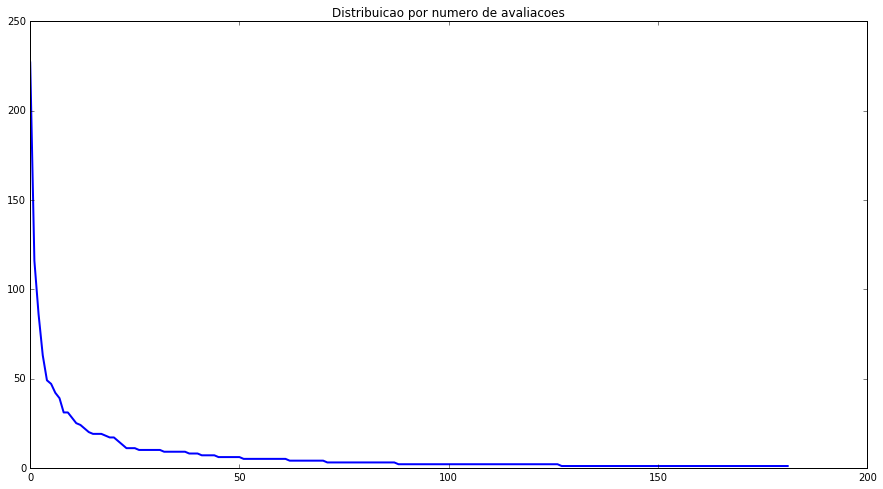

In [129]:
plt.gcf().set_size_inches(15, 8, forward=True)
plt.title('Distribuicao por numero de avaliacoes')


plt.plot(range(len(values)), values, linewidth=2.0)
plt.show()